# Visualization for Dataset

# How to read dataset in panda:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE']) # Convert the DATE type from string to datetime

unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


# plt.show() or plt.plot(): 
The plot() function would generate an empty plot with just the axes and ticks and the show() function would display that plot.

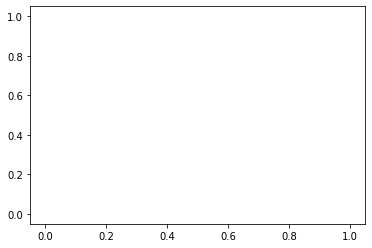

In [2]:
plt.plot()
plt.show()

# Line Plot

By default, Matplotlib displayed a coordinate grid with:

the x-axis and y-axis values ranging from -0.06 to 0.06
* no grid lines
* no data

plt.plot(x_values, y_values)
Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances

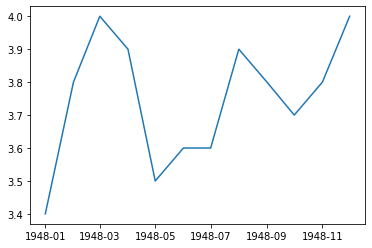

In [3]:
x_values = unrate['DATE'].head(12)
y_values = unrate['VALUE'].head(12)

plt.plot(x_values, y_values)
plt.show()

 # xticks, xlabel, ylabel, title
 y-axis looks fine, the x-axis tick labels are too close together. 
 We can rotate the x-axis tick labels by 90 degrees so they don't overlap. The xticks()

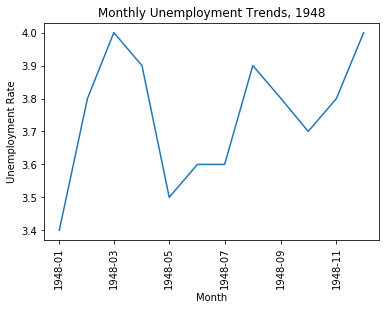

In [4]:
x_values = unrate['DATE'].head(12)
y_values = unrate['VALUE'].head(12)

plt.plot(x_values, y_values)
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

# Multiple plots

When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to

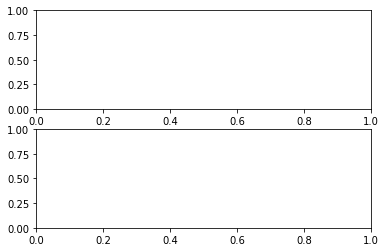

In [5]:
fig = plt.figure() # Create an empty figure
ax1 = fig.add_subplot(2,1,1) # add figures into it
ax2 = fig.add_subplot(2,1,2)
plt.show() # display it

Instead of only calling the pyplot function, we assigned its return value to a variable (fig).

How to creat multiple figure?

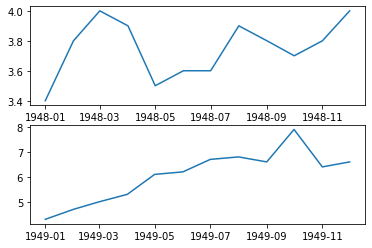

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

x_values = unrate['DATE'].head(12) # First 12
y_values = unrate['VALUE'].head(12)
ax1.plot(x_values, y_values)

x2_values = unrate['DATE'][12:24] # Extract rows 12 to 24
y2_values = unrate['VALUE'][12:24]
ax2.plot(x2_values, y2_values)
plt.show()

# To improve axis readability for plots, we use 

fig = plt.figure(figsize=(width, height)) #The unit for both width and height values is inches. The dpi parameter, or dots per inch, and the figsize parameter determine how much space

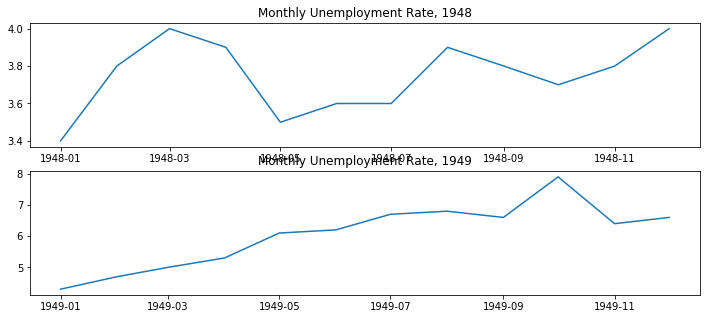

In [7]:
fig = plt.figure(figsize = (12, 5))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')

ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')

plt.show()

# How to auto generate multiple plots?

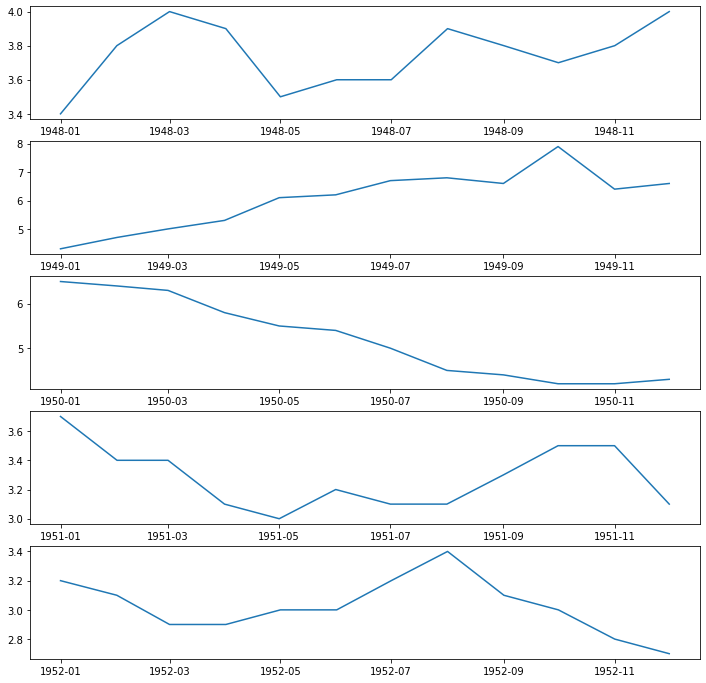

In [8]:
fig = plt.figure(figsize=(12,12)) # 12 and 12 are width and height of fig not subplot

for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    start_index = i * 12
    end_index = (i + 1) * 12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])
    
plt.show()

# If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. 

## First, we'll explore how to extract just the month values from the DATE column.


In [9]:
unrate['MONTH'] = unrate['DATE'].dt.month # assign to new col

Calling pandas.Series.dt.month returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.).

call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot. By default, matplotlib will select a different color for each line. To specify the color ourselves, use the c parameter when calling plot().
eg. plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')

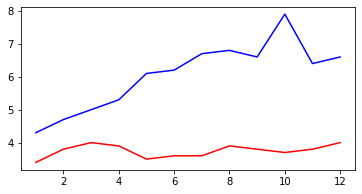

In [10]:
fig = plt.figure(figsize = (6, 3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

# Visualize 5 plots on a same figure with for loop and legend

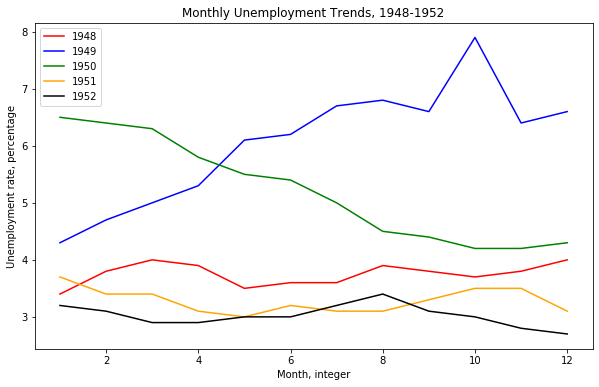

In [11]:
fig = plt.figure(figsize = (10,6))
color = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i * 12
    end_index = (i + 1) * 12
    #plt.plot(unrate[start_index:end_index]['MONTH'], unrate[start_index:end_index]['VALUE'], c = color[i])
    plt.plot(unrate[start_index:end_index]['MONTH'], unrate[start_index:end_index]['VALUE'], c=color[i], label = str(1948 + i))

plt.legend(loc = 'upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel('Month, integer')
plt.ylabel('Unemployment rate, percentage')
plt.show()


# Bar Plot and ScatterPlot

In [12]:
import pandas as pd

reviews = pd.read_csv("fandango_scores.csv")

norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]

print(norm_reviews.head(5))
norm_reviews.info()

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0       3.90                   4.5             5.0  
1       3.55                   4.5             5.0  
2       3.90                   4.5             5.0  
3       2.70                   4.5             5.0  
4       2.55                   3.0             3.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    

 An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.
 
 To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels.

# How to plot a vertical bar chart?

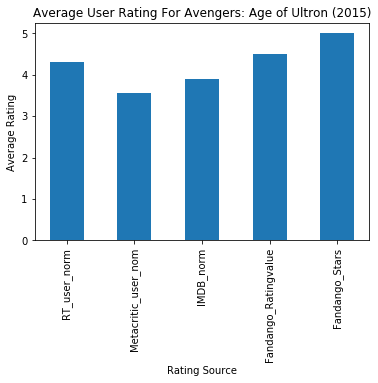

In [13]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

# Get the related column and extract the first element of each column, which is the wanted data.
bar_heights = norm_reviews[num_cols].iloc[0].values # .valyes turns series into numpy ndarray
bar_positions = arange(5) # return evenly spaced values
# 0.75 is the first x-diff between 0 and 1st vertical bar

fig, ax = plt.subplots() # returned figure object is fig and axes object is ax (a single subplot)
tick_positions = range(0,5)

ax.bar(bar_positions, bar_heights, 0.5) # width of each bar is 0.5

ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()


# How to plot horizontal bar chart?

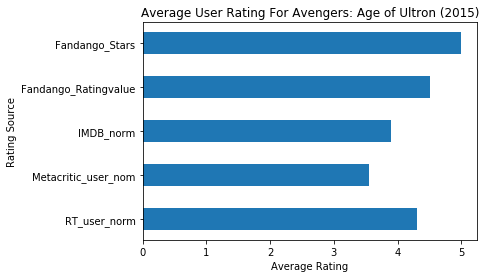

In [14]:
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)
tick_positions = range(0,5)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5) # height = 0.5, bar_pos is not the data
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

In [15]:
bar_heights = norm_reviews[num_cols].iloc[0].values
print(bar_heights)
print(type(bar_heights))

[4.3  3.55 3.9  4.5  5.  ]
<class 'numpy.ndarray'>


From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. Bar charts are good if we don't have many type of data.

# Scatter Plot:
A scatter plot helps us determine if 2 columns are weakly or strongly correlated.

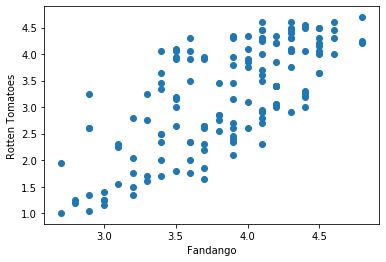

In [16]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

# How to plot multiple scatterplot?

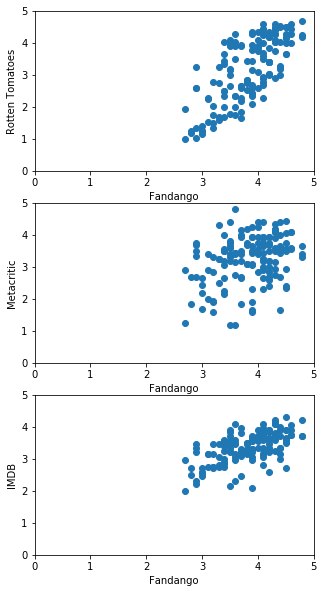

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

# how to visualize the distributions of user ratings using histograms and box plots?

 frequency distributions 

In [18]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index() # Descending before sort_index

imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


# Problem

What percent of the ratings are contained in the 2.0 to 4.0 range?
* How does this compare with other sites?

Which values represent the top 25% of the ratings? The bottom 25%?
* How does this compare with other sites?

Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values.

# Histogram!
Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

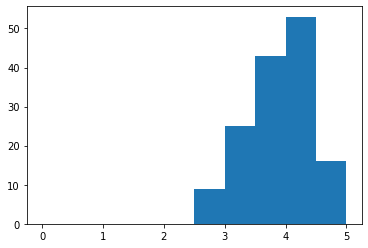

In [19]:
fig, ax = plt.subplots()

ax.hist(norm_reviews['Fandango_Ratingvalue'], range = (0, 5))

plt.show()

examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range.

# Plotting muliple histogram:

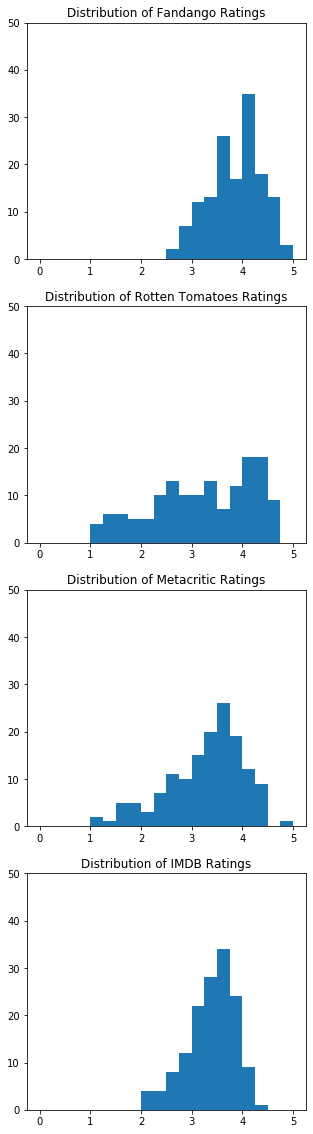

In [20]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins = 20, range = (0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins = 20, range = (0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins = 20, range = (0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins = 20, range = (0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()


# From the histograms, we can make the following observations:

* Around 50% of user ratings from Fandango fall in the 2 to 4 score range
* Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
* Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
* Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

Histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites
# Boxplots !

The two regions contained within the box in the middle make up the interquartile range, or IQR. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.


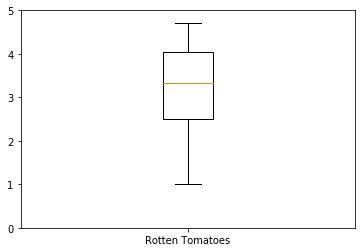

In [21]:

fig, ax = plt.subplots()
tickers = ['Rotten Tomatoes']
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
ax.set_xticklabels(tickers) # Use Axes.set_xticklabels() to set the x-axis tick labels. This method's required parameter is an iterable object, even for just a single value.
plt.show()

When selecting multiple columns to pass in to Axes.boxplot(), we need to use the values accessor to return a multi-dimensional numpy array

How to plot muliple boxplots together in one graph?

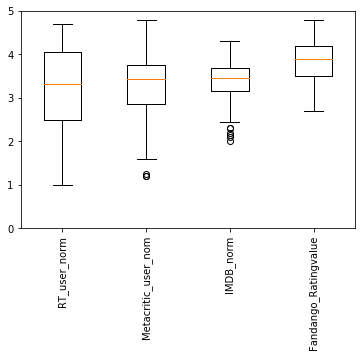

In [22]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_ylim(0,5)
plt.show()

# From the boxplot, we can reach the following conclusions:

* user ratings from Rotten Tomatoes and Metacritic span a larger range of values
* user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

Couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.